<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/Practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alpha = 1
Numerical Mean: 0.5599
Analytical Mean: 0.5642
Numerical Variance: 0.1792
Analytical Variance: 0.1792
Alpha = 2
Numerical Mean: 0.4005
Analytical Mean: 0.3989
Numerical Variance: 0.0909
Analytical Variance: 0.0909
Alpha = 3
Numerical Mean: 0.3251
Analytical Mean: 0.3257
Numerical Variance: 0.0610
Analytical Variance: 0.0610


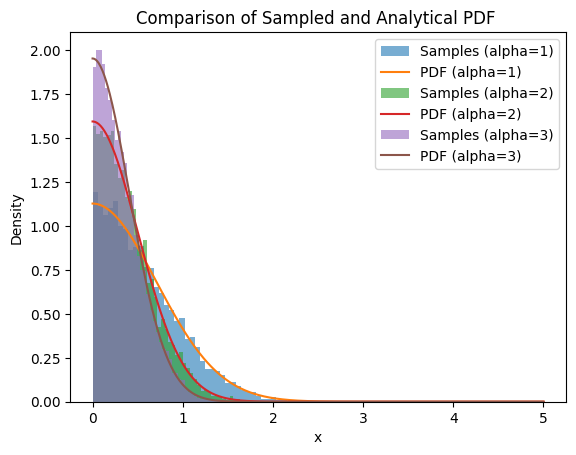

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Probability density function
def pdf(x, alpha):
    A = 2 * np.sqrt(alpha / np.pi)
    return A * np.exp(-alpha * x**2)
def manual_mean(alpha):
  return (1/np.sqrt(np.pi*alpha))
# Sampling the distribution using Gaussian method
def sample_distribution(alpha, size=10000):
    # Standard deviation for Gaussian distribution
    sigma = np.sqrt(1 / (2 * alpha))
    # Draw samples from N(0, sigma^2)
    #size parameter determines the shape and number of random samples to be generated.
    samples = np.random.normal(0, sigma, size)
    # Take the absolute value to match the distribution on [0, ∞]
    samples = np.abs(samples)
    #if [-∞,0] then -np.abs(samples)
    return samples

# Values of alpha to test
alphas = [1, 2, 3]
x_vals = np.linspace(0, 5, 500)
def calculate_mean(samples):
    total = 0
    for x in samples:
        total += x
    return total / len(samples)

# Calculate variance manually
def calculate_variance(samples, mean):
    total = 0
    for x in samples:
        total += (x - mean) ** 2
    return total / len(samples)
# Sampling and plotting
for alpha in alphas:
    # Generate samples
    samples = sample_distribution(alpha)

    # Plot the histogram of the samples
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f"Samples (alpha={alpha})")

    # Plot the analytical PDF
    plt.plot(x_vals, pdf(x_vals, alpha), label=f"PDF (alpha={alpha})")

    # Calculate numerical mean and variance
    mean_numerical = calculate_mean(samples)
    variance_numerical = calculate_variance(samples,mean_numerical)
    var=np.var(samples)
    print(f"Alpha = {alpha}")
    print(f"Numerical Mean: {mean_numerical:.4f}")
    print(f"Analytical Mean: {manual_mean(alpha):.4f}")
    print(f"Numerical Variance: {variance_numerical:.4f}")
    print(f"Analytical Variance: {var:.4f}")


# Plot formatting
plt.title("Comparison of Sampled and Analytical PDF ")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


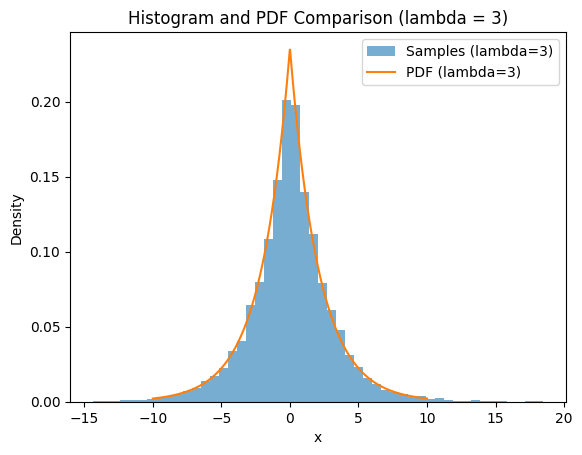

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdas = 3
mu = 0
size = 10000

# Sampling function
def sample_distribution(lambda_, size):
    u1 = np.random.uniform(0, 1, size)
    u2 = np.random.uniform(0, 1, size)
    s = np.where(u1 < 0.5, 1, -1)
    x = s * lambda_ * np.log(u2) / np.sqrt(2)
    return x

# Plot histograms and PDFs
x_vals = np.linspace(-10, 10, 1000)

samples = sample_distribution(lambda_, size)
plt.hist(samples, bins=50, density=True, alpha=0.6, label=f"Samples (lambda={lambda_})")
pdf = (1 / (np.sqrt(2) * lambda_)) * np.exp(-np.sqrt(2) * np.abs(x_vals - mu) / lambda_)
plt.plot(x_vals, pdf, label=f"PDF (lambda={lambda_})")
plt.title(f"Histogram and PDF Comparison (lambda = {lambda_})")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


Alpha = 1
Numerical Variance (np.var): 1.0244
Theoretical Variance: 1.0244


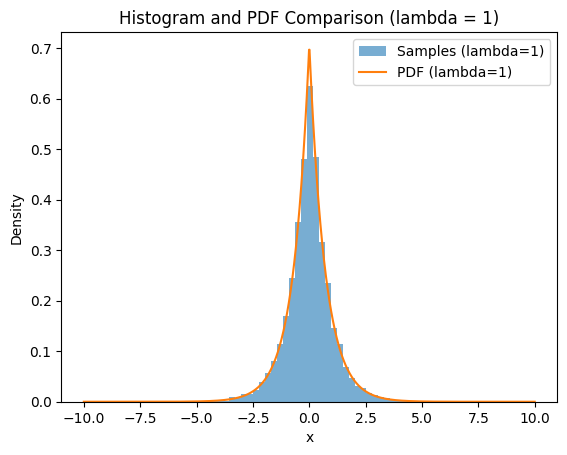

Alpha = 2
Numerical Variance (np.var): 4.0753
Theoretical Variance: 4.0753


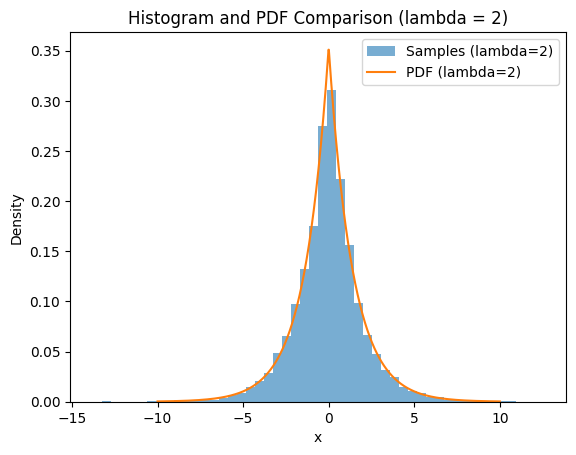

Alpha = 3
Numerical Variance (np.var): 8.8139
Theoretical Variance: 8.8139


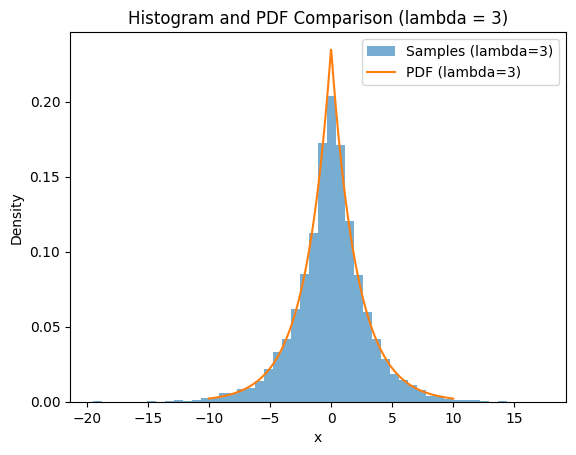

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdas = [1, 2, 3]
mu = 0
size = 10000

# Sampling function
def sample_distribution(lambda_, size):
    u1 = np.random.uniform(0, 1, size)
    u2 = np.random.uniform(0, 1, size)
    s = np.where(u1 < 0.5, 1, -1)
    x = s * lambda_ * np.log(u2) / np.sqrt(2)
    return x

# Calculate variance manually
# Renamed from 'var' to 'calculate_variance' to avoid conflict with np.var
def calculate_variance(samples):
  total=0
  mean=np.mean(samples)
  for x in samples:
    total+=(x-mean)**2
  return total/len(samples)

# Plot histograms and PDFs
x_vals = np.linspace(-10, 10, 1000)
for lambda_ in lambdas:
    samples = sample_distribution(lambda_, size)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f"Samples (lambda={lambda_})")
    pdf = (1 / (np.sqrt(2) * lambda_)) * np.exp(-np.sqrt(2) * np.abs(x_vals - mu) / lambda_)

    # Calculate and print variances using different methods
    numerical_variance = np.var(samples) # Using np.var
    print(f"Alpha = {lambda_}")
    print(f"Numerical Variance (np.var): {numerical_variance:.4f}")

    theoretical_variance = calculate_variance(samples)  # Using custom function
    print(f"Theoretical Variance: {theoretical_variance:.4f}")

    plt.plot(x_vals, pdf, label=f"PDF (lambda={lambda_})")
    plt.title(f"Histogram and PDF Comparison (lambda = {lambda_})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

Alpha = 1
Numerical Mean: -0.5639
Numerical Variance: 0.1820
------------------------------
Alpha = 2
Numerical Mean: -0.3950
Numerical Variance: 0.0896
------------------------------
Alpha = 3
Numerical Mean: -0.3258
Numerical Variance: 0.0586
------------------------------


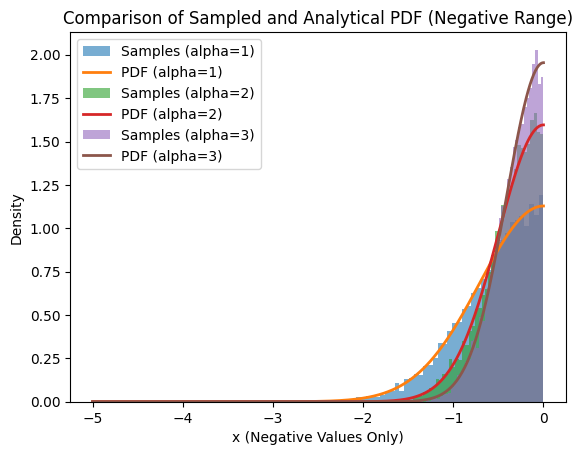

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Probability density function for the negative range
def pdf(x, alpha):
    sigma = np.sqrt(1 / (2 * alpha))
    A = 2 / (np.sqrt(2 * np.pi) * sigma)
    return A * np.exp(-x**2 / (2 * sigma**2))

# Sampling the distribution for negative range
def sample_distribution(alpha, size=10000):
    sigma = np.sqrt(1 / (2 * alpha))  # Standard deviation
    samples = -np.abs(np.random.normal(0, sigma, size))  # Restrict to negative values
    return samples

# Manual calculation of mean
def calculate_mean(samples):
    total = 0
    for x in samples:
        total += x
    return total / len(samples)

# Manual calculation of variance
def calculate_variance(samples, mean):
    total = 0
    for x in samples:
        total += (x - mean) ** 2
    return total / len(samples)

# Parameters
alphas = [1, 2, 3]
x_vals = np.linspace(-5, 0, 500)  # Negative range

# Sampling and plotting
for alpha in alphas:
    # Generate samples
    samples = sample_distribution(alpha)

    # Plot the histogram of the samples
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f"Samples (alpha={alpha})")

    # Plot the analytical PDF
    plt.plot(x_vals, pdf(x_vals, alpha), label=f"PDF (alpha={alpha})", linewidth=2)

    # Calculate numerical mean and variance
    mean_numerical = calculate_mean(samples)
    variance_numerical = calculate_variance(samples, mean_numerical)
    print(f"Alpha = {alpha}")
    print(f"Numerical Mean: {mean_numerical:.4f}")
    print(f"Numerical Variance: {variance_numerical:.4f}")
    print("-" * 30)

# Plot formatting
plt.title("Comparison of Sampled and Analytical PDF (Negative Range)")
plt.xlabel("x (Negative Values Only)")
plt.ylabel("Density")
plt.legend()
plt.show()
